In [110]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import MiniBatchKMeans
from scipy.stats import randint
%matplotlib inline

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data" 
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class'] 
dataset = pd.read_csv(url, names=names) 

In [4]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
X = dataset.drop('Class',axis=1) 
y = dataset['Class'] 

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [58]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
pca = PCA(1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [74]:
explained_variance = pca.explained_variance_ratio_

In [75]:
explained_variance

array([0.72226528])

In [42]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [43]:
y_pred = classifier.predict(X_test)

In [48]:
cm = confusion_matrix(y_test, y_pred)

In [49]:
accuracy_score(y_test, y_pred)

0.9333333333333333

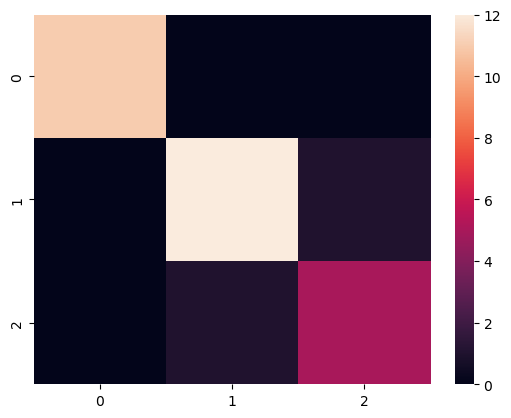

In [53]:
sns.heatmap(cm);

In [77]:
nba = pd.read_csv("nba_2013.csv")

In [78]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [86]:
kmeans = KMeans(n_clusters=5, random_state=1)
numeric_cols = nba._get_numeric_data().dropna(axis=1)
kmeans.fit(numeric_cols)

KMeans(n_clusters=5, random_state=1)

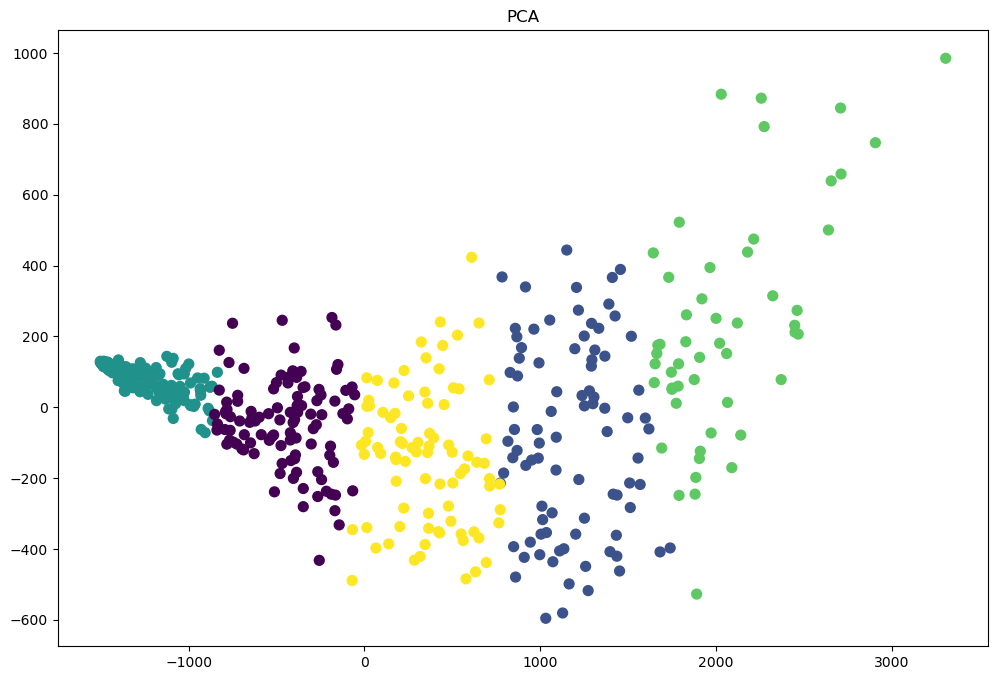

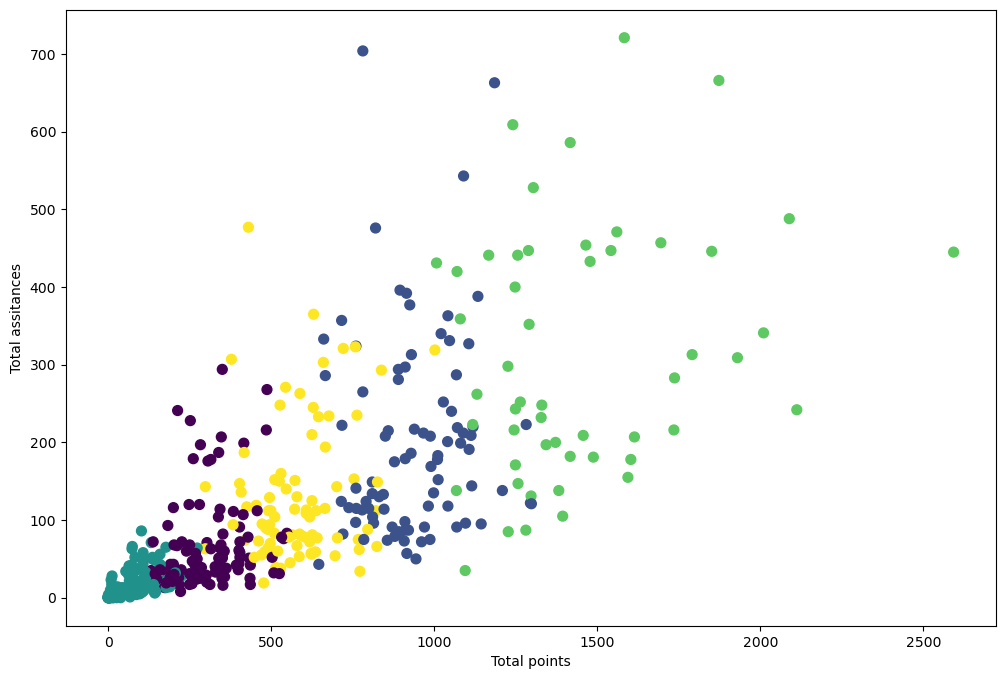

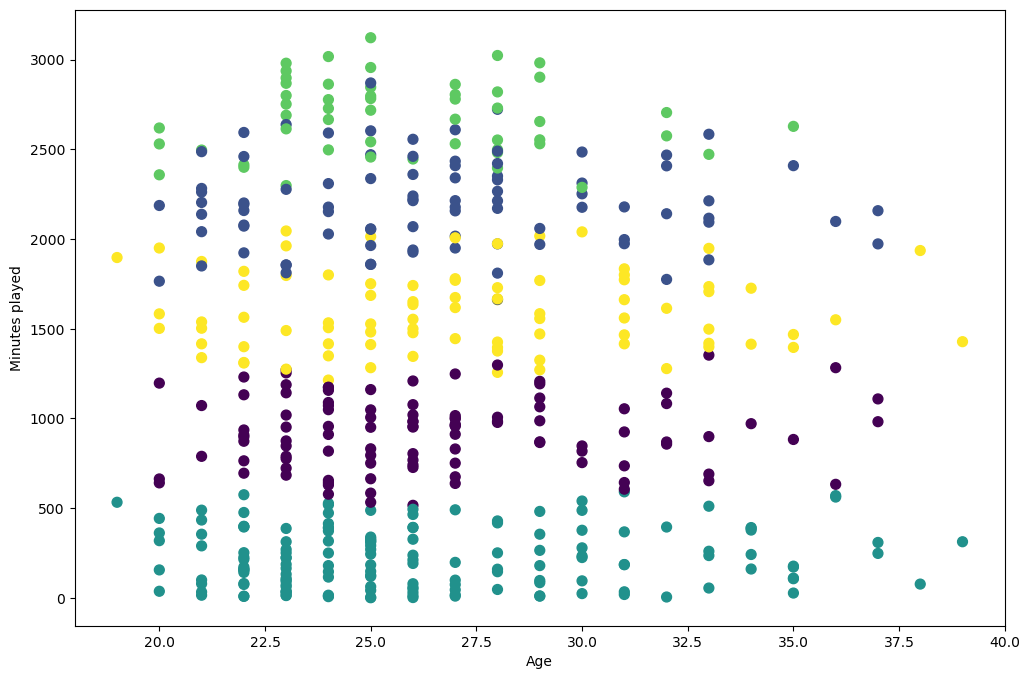

In [106]:

pca = PCA(n_components=2)
res = pca.fit_transform(numeric_cols)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=kmeans.labels_, s=50, cmap='viridis');
plt.title('PCA');

plt.figure(figsize=(12,8))
plt.scatter(nba['pts'], nba['ast'], c=kmeans.labels_, s=50, cmap='viridis');
plt.xlabel('Total points');
plt.ylabel('Total assitances');

plt.figure(figsize=(12,8))
plt.scatter(nba['age'], nba['mp'], c=kmeans.labels_, s=50, cmap='viridis');
plt.xlabel('Age');
plt.ylabel('Minutes played');

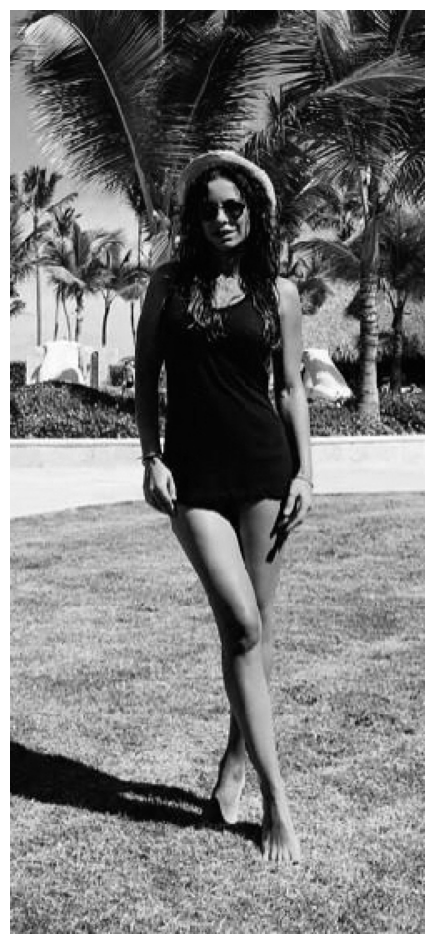

In [103]:
img = mpimg.imread("woman.jpg")[..., 1]
plt.figure(figsize = (20, 12))
plt.axis('off')
plt.imshow(img, cmap='gray');

D:\Program files\ana3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


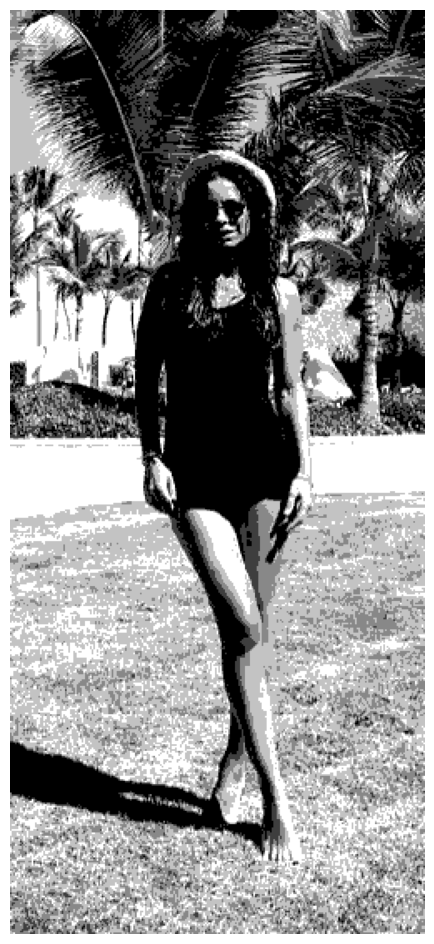

In [112]:
X = img.reshape((-1, 1))
k_means = MiniBatchKMeans(n_clusters=5)
k_means.fit(X)
values = k_means.cluster_centers_
labels = k_means.labels_
img_compressed = values[labels].reshape(img.shape)
plt.figure(figsize = (20, 12))
plt.axis('off');
plt.imshow(img_compressed, cmap = 'gray');

In [114]:
labels

array([0, 0, 0, ..., 3, 3, 3])